In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split

In [3]:
path = 'smsspamcollection/SMSSpamCollection'

In [4]:
messages = pandas.read_csv(path, sep='\t', names=["label", "message"])

In [5]:
print(messages.groupby('label').describe())

                                                        message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4


Спама почти в 7 раз меньше, это значит, что выборка несбалансированная. 

In [6]:
len(messages)

5572

In [7]:
dummy = np.array(['ham']*len(messages))

In [8]:
dummy

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], 
      dtype='<U3')

In [9]:
print(classification_report(dummy, messages['label']))

             precision    recall  f1-score   support

        ham       1.00      0.87      0.93      5572
       spam       0.00      0.00      0.00         0

avg / total       1.00      0.87      0.93      5572



/home/religofsil/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Как видно, dummy-классификатор по факту ничего не делает, но при этом очень редко ошибается. ~~Прямо как я.~~ Это всё потому, что выборка несбалансированная, и если классификатор просто даёт самый популярный ответ, получается уже хорошо. Для реальной жизни такое, конечно, не подходит -- зачем нам алгоритм выявления спама, который не выявляет спам?

In [220]:
balanced_messages = messages[messages['label'] == 'spam']

In [221]:
bm2 = messages[messages['label'] == 'ham'][::7]

In [222]:
balanced_messages = pandas.concat([balanced_messages, bm2])

In [30]:
balanced_messages

,label,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
12,spam,URGENT! You have won a 1 week FREE membership ...
15,spam,"XXXMobileMovieClub: To use your credit, click ..."
19,spam,England v Macedonia - dont miss the goals/team...
34,spam,Thanks for your subscription to Ringtone UK yo...
42,spam,07732584351 - Rodger Burns - MSG = We tried to...


In [31]:
print(balanced_messages.groupby('label').describe())

                                                        message
label                                                          
ham   count                                                 690
      unique                                                678
      top                                Sorry, I'll call later
      freq                                                    5
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4


Вот, теперь норм и всего примерно поровну. Ура.

In [34]:
bow1 = CountVectorizer()
bow1.fit_transform(balanced_messages['message'])

<1437x4429 sparse matrix of type '<class 'numpy.int64'>'
	with 24887 stored elements in Compressed Sparse Row format>

In [35]:
print(bow1.vocabulary_)

{'mila': 2674, 'push': 3226, '078498': 44, 'popping': 3132, 'ears': 1666, 'k52': 2343, 'date': 1495, 'cinema': 1312, 'might': 2673, 'unlimited': 4104, 'logged': 2499, '07781482378': 34, 'polyphonic': 3126, 'regard': 3314, 'mad': 2571, 'app': 896, 'ors': 2962, 'faith': 1777, '26th': 409, 'forget': 1876, 'mid': 2671, 'however': 2178, 'nos': 2869, 'hunks': 2192, 'lautech': 2420, 'kid': 2365, 'said': 3426, 'fuck': 1913, '150pm': 348, 'mtmsg18': 2772, '09061701939': 225, '4txt': 547, 'mailbox': 2582, '114': 313, '83738': 680, '30th': 460, 'ringing': 3377, 'entitled': 1715, 'looks': 2516, 'shower': 3543, '37819': 478, 'trouble': 4030, 'box434sk38wp150ppm18': 1122, 'randomly': 3258, 'neway': 2835, 'friend': 1901, 'simpsons': 3563, 'lucozade': 2548, 'homeowners': 2152, 'attention': 950, 'wot': 4353, 'will': 4302, 'birthday': 1057, 'five': 1840, 'gary': 1947, 'enjoy': 1708, 'gnarls': 1990, 'millers': 2675, 'messaging': 2662, 'rofl': 3390, 'flirting': 1850, '89938': 727, 'number': 2888, 'kate': 

In [36]:
bowed_messages = bow1.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [38]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.958945221445 0.00787427012284


Это были дефолтные параметры токенизации и всего остального.

In [39]:
bow2 = CountVectorizer(token_pattern=r"(?u)\b\w\w+\b|!|\?|\"|\'|,")
bow2.fit_transform(balanced_messages['message'])

<1437x4434 sparse matrix of type '<class 'numpy.int64'>'
	with 26312 stored elements in Compressed Sparse Row format>

In [40]:
print(bow2.vocabulary_)

{'mila': 2679, 'push': 3231, '078498': 48, 'popping': 3137, 'ears': 1671, 'k52': 2348, 'date': 1500, 'cinema': 1317, 'might': 2678, 'unlimited': 4109, 'logged': 2504, '07781482378': 38, 'polyphonic': 3131, 'regard': 3319, 'mad': 2576, 'app': 901, 'ors': 2967, 'faith': 1782, '26th': 413, 'forget': 1881, 'mid': 2676, 'however': 2183, 'nos': 2874, 'hunks': 2197, 'lautech': 2425, 'kid': 2370, 'said': 3431, 'fuck': 1918, '150pm': 352, 'mtmsg18': 2777, '09061701939': 229, '4txt': 551, 'mailbox': 2587, '114': 317, '83738': 684, '30th': 464, 'ringing': 3382, 'entitled': 1720, 'looks': 2521, 'shower': 3548, '37819': 482, 'trouble': 4035, 'box434sk38wp150ppm18': 1127, 'randomly': 3263, 'neway': 2840, 'friend': 1906, 'simpsons': 3568, 'lucozade': 2553, 'homeowners': 2157, 'attention': 955, 'wot': 4358, 'will': 4307, 'birthday': 1062, 'five': 1845, 'gary': 1952, 'enjoy': 1713, 'gnarls': 1995, 'millers': 2680, 'messaging': 2667, 'rofl': 3395, 'flirting': 1855, '89938': 731, 'number': 2893, '"': 1, 

In [41]:
bowed_messages = bow2.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [42]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.958954933955 0.008977895355


Это была модель, которая смотрит на знаки препинания как на отдельные токены. Практически никакой разницы с предыдущей.

In [49]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems

In [50]:
bow3 = CountVectorizer(tokenizer = tokenize)
bow3.fit_transform(balanced_messages['message'])

<1437x4351 sparse matrix of type '<class 'numpy.int64'>'
	with 28957 stored elements in Compressed Sparse Row format>

In [52]:
print(bow3.vocabulary_)

{'mila': 2667, 'push': 3166, 'just..': 2367, 'includ': 2267, 'nyt.ec2a.3lp.msg': 2864, '100p/sm': 397, 'norm150p/ton': 2835, 'k52': 2372, 'date': 1590, 'friend': 1950, 'govt.instituit': 2063, 'might': 2666, 'prize.to': 3131, 'regard': 3240, 'mad': 2575, 'app': 1040, 'releas': 3246, 'faith': 1840, 'www.sms.ac/u/nat27081980': 4201, '26th': 535, 'delux': 1617, 'bundl': 1294, '*sent': 40, 'lautech': 2445, 'head…': 2125, 'kid': 2393, 'said': 3336, 'fuck': 1963, '150pm': 456, 'realiz': 3213, '30th': 591, 'frnds..': 1954, 'christma': 1431, '80488.': 786, 'lucki': 2552, 'shower': 3433, 'neway': 2798, '16+': 465, 'cinema': 1435, 'previou': 3120, 'boltblu': 1221, 'alreadi': 997, 'jone': 2352, 'wot': 4152, 'will': 4112, 'birthday': 1192, 'five': 1895, 'y': 4236, 'mobsi.com': 2704, 'enjoy': 1776, 'rofl': 3299, '02/09/03': 94, 'otherwis': 2937, '88600.': 859, '89938': 873, 'number': 2856, 'videosounds+2': 3995, 'kate': 2379, '£3.00': 4321, 'break': 1261, 'arcad': 1050, 'b': 1107, 'phoenix': 3013, '

In [53]:
bowed_messages = bow3.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [54]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.956871600622 0.0106117880617


Это была модель со стеммингом. Со стеммингом чуть хуже.

In [55]:
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [56]:
bow4 = CountVectorizer(tokenizer=LemmaTokenizer())
bow4.fit_transform(balanced_messages['message'])

<1437x4626 sparse matrix of type '<class 'numpy.int64'>'
	with 28974 stored elements in Compressed Sparse Row format>

In [57]:
print(bow4.vocabulary_)

{'mila': 2806, 'tenant': 3961, 'push': 3339, 'just..': 2480, 'nyt.ec2a.3lp.msg': 3013, 'popping': 3250, 'k52': 2485, 'date': 1638, 'cinema': 1464, 'might': 2805, 'prize.to': 3301, 'unlimited': 4185, 'logged': 2629, 'really': 3395, 'polyphonic': 3244, 'regard': 3426, 'mad': 2705, 'app': 1043, 'faith': 1913, 'www.sms.ac/u/nat27081980': 4475, '26th': 535, 'priority': 3296, 'however': 2313, '*sent': 40, 'lautech': 2561, '09061702893': 305, 'said': 3536, 'fuck': 2048, '150pm': 456, 'mailbox': 2715, '30th': 591, 'frnds..': 2039, 'ringing': 3485, 'entitled': 1851, '80488.': 785, 'gals..': 2072, 'shower': 3646, 'trouble': 4112, 'randomly': 3371, 'neway': 2946, '16+': 465, 'friend': 2034, 'lucozade': 2680, 'attention': 1093, 'wot': 4427, 'will': 4380, 'birthday': 1203, 'five': 1971, 'gary': 2080, 'y': 4510, 'mobsi.com': 2846, 'enjoy': 1844, 'messaging': 2794, 'rofl': 3499, 'flirting': 1980, '88600.': 858, '89938': 872, 'number': 3005, 'videosounds+2': 4253, 'kate': 2492, '£3.00': 4596, 'break':

In [58]:
bowed_messages = bow4.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.952695221445 0.0114831781104


Это была модель с лемматизацией. С лемматизацией ещё немножко хуже.

In [60]:
bow5 = CountVectorizer(stop_words='english')
bow5.fit_transform(balanced_messages['message'])

<1437x4209 sparse matrix of type '<class 'numpy.int64'>'
	with 16026 stored elements in Compressed Sparse Row format>

In [61]:
print(bow5.vocabulary_)

{'mila': 2564, 'push': 3081, '078498': 44, 'popping': 2987, 'ears': 1613, 'k52': 2243, 'date': 1450, 'cinema': 1270, 'rofl': 3242, 'unlimited': 3916, 'logged': 2395, '07781482378': 34, 'polyphonic': 2981, 'regard': 3166, 'mad': 2466, 'app': 874, 'ors': 2827, 'faith': 1713, '26th': 409, 'forget': 1805, 'mid': 2562, 'nos': 2746, 'hunks': 2102, 'lautech': 2318, 'kid': 2264, 'fault': 1734, 'said': 3278, 'fuck': 1839, '150pm': 348, 'mtmsg18': 2658, '09061701939': 225, '4txt': 547, 'mailbox': 2476, '114': 313, '83738': 680, '30th': 460, 'ringing': 3229, 'entitled': 1658, 'looks': 2412, 'shower': 3388, '37819': 478, 'trouble': 3845, 'box434sk38wp150ppm18': 1085, 'randomly': 3112, 'neway': 2715, 'friend': 1828, 'simpsons': 3407, 'lucozade': 2443, 'homeowners': 2064, 'attention': 924, 'wot': 4139, 'birthday': 1021, 'gary': 1871, 'enjoy': 1652, 'gnarls': 1912, 'millers': 2565, 'messaging': 2553, 'flirting': 1780, '89938': 727, 'number': 2762, 'kate': 2250, 'break': 1098, 'course': 1386, 'phoenix

In [62]:
bowed_messages = bow5.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.950597319347 0.0143937960321


Со стоп-словами ещё чуть хуже.

In [120]:
bow6 = CountVectorizer(max_df=.25)
bow6.fit_transform(balanced_messages['message'])

<1437x4426 sparse matrix of type '<class 'numpy.int64'>'
	with 23444 stored elements in Compressed Sparse Row format>

In [121]:
print(bow6.vocabulary_)

{'mila': 2673, 'push': 3225, '078498': 44, 'popping': 3131, 'ears': 1665, 'k52': 2342, 'date': 1494, 'cinema': 1311, 'might': 2672, 'unlimited': 4102, 'logged': 2498, '07781482378': 34, 'polyphonic': 3125, 'regard': 3313, 'mad': 2570, 'app': 896, 'ors': 2961, 'faith': 1776, '26th': 409, 'forget': 1875, 'mid': 2670, 'however': 2177, 'nos': 2868, 'hunks': 2191, 'lautech': 2419, 'kid': 2364, 'said': 3425, 'fuck': 1912, '150pm': 348, 'mtmsg18': 2771, '09061701939': 225, '4txt': 547, 'mailbox': 2581, '114': 313, '83738': 680, '30th': 460, 'ringing': 3376, 'entitled': 1714, 'looks': 2515, 'shower': 3542, '37819': 478, 'trouble': 4028, 'box434sk38wp150ppm18': 1122, 'randomly': 3257, 'neway': 2834, 'friend': 1900, 'simpsons': 3562, 'lucozade': 2547, 'homeowners': 2151, 'attention': 950, 'wot': 4351, 'will': 4300, 'birthday': 1057, 'five': 1839, 'gary': 1946, 'enjoy': 1707, 'gnarls': 1989, 'millers': 2674, 'messaging': 2661, 'rofl': 3389, 'flirting': 1849, '89938': 727, 'number': 2887, 'kate': 

In [122]:
bowed_messages = bow6.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [123]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.95963966589 0.00747325239885


Ограничение сверху на частотность даёт незначительный прирост к точности. Ограничения снизу либо не влияют, либо уменьшают точность (поэтому я их убрала).

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
bow7 = TfidfVectorizer()
bow7.fit_transform(balanced_messages['message'])

<1437x4426 sparse matrix of type '<class 'numpy.float64'>'
	with 23444 stored elements in Compressed Sparse Row format>

In [132]:
print(bow7.vocabulary_)

{'mila': 2673, 'push': 3225, '078498': 44, 'popping': 3131, 'ears': 1665, 'k52': 2342, 'date': 1494, 'cinema': 1311, 'might': 2672, 'unlimited': 4102, 'logged': 2498, '07781482378': 34, 'polyphonic': 3125, 'regard': 3313, 'mad': 2570, 'app': 896, 'ors': 2961, 'faith': 1776, '26th': 409, 'forget': 1875, 'mid': 2670, 'however': 2177, 'nos': 2868, 'hunks': 2191, 'lautech': 2419, 'kid': 2364, 'said': 3425, 'fuck': 1912, '150pm': 348, 'mtmsg18': 2771, '09061701939': 225, '4txt': 547, 'mailbox': 2581, '114': 313, '83738': 680, '30th': 460, 'ringing': 3376, 'entitled': 1714, 'looks': 2515, 'shower': 3542, '37819': 478, 'trouble': 4028, 'box434sk38wp150ppm18': 1122, 'randomly': 3257, 'neway': 2834, 'friend': 1900, 'simpsons': 3562, 'lucozade': 2547, 'homeowners': 2151, 'attention': 950, 'wot': 4351, 'will': 4300, 'birthday': 1057, 'five': 1839, 'gary': 1946, 'enjoy': 1707, 'gnarls': 1989, 'millers': 2674, 'messaging': 2661, 'rofl': 3389, 'flirting': 1849, '89938': 727, 'number': 2887, 'kate': 

In [164]:
bowed_messages = bow7.transform(balanced_messages['message'])
naive_model = MultinomialNB()
naive_model.fit(bowed_messages, balanced_messages['label'])

In [134]:
cv_results = cross_val_score(naive_model, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.961747280497 0.0120949226744


TfidfVectorizer ещё немножко лучше работает.

In [137]:
print(classification_report(naive_model.predict(bowed_messages), balanced_messages['label']))

             precision    recall  f1-score   support

        ham       0.99      0.97      0.98       706
       spam       0.97      0.99      0.98       731

avg / total       0.98      0.98      0.98      1437



In [200]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier()
treeclf.fit(bowed_messages, balanced_messages['label'])

In [152]:
cv_results2 = cross_val_score(treeclf, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results2.mean(), cv_results2.std())

0.901893939394 0.0197460099825


Дерево хуже работает.

In [153]:
print(classification_report(treeclf.predict(bowed_messages), balanced_messages['label']))

             precision    recall  f1-score   support

        ham       1.00      1.00      1.00       690
       spam       1.00      1.00      1.00       747

avg / total       1.00      1.00      1.00      1437



И какое-то переобученное, кажется, получилось.

In [205]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(bowed_messages, balanced_messages['label'])

In [150]:
cv_results3 = cross_val_score(forest, bowed_messages, balanced_messages['label'], cv=10, scoring='accuracy')
print(cv_results3.mean(), cv_results3.std())

0.931789044289 0.0120411659306


Лучше дерева, хуже байеса.

In [151]:
print(classification_report(forest.predict(bowed_messages), balanced_messages['label']))

             precision    recall  f1-score   support

        ham       1.00      0.99      1.00       696
       spam       0.99      1.00      1.00       741

avg / total       1.00      1.00      1.00      1437



Тоже переобучился, кажется?

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

<module 'matplotlib.pyplot' from '/home/religofsil/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

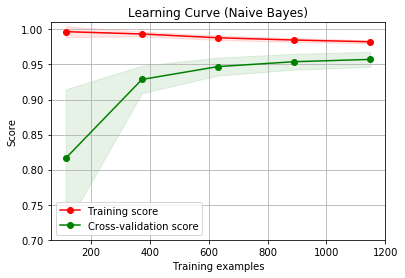

In [157]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

X, y = bowed_messages, balanced_messages['label']


title = "Learning Curve (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = naive_model
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/home/religofsil/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

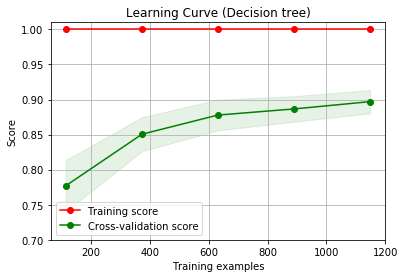

In [158]:
title = "Learning Curve (Decision tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = treeclf
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

<module 'matplotlib.pyplot' from '/home/religofsil/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

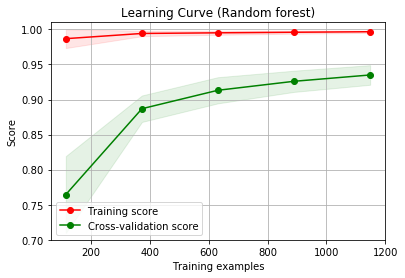

In [159]:
title = "Learning Curve (Random forest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = forest
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

Вроде бы для дерева и леса, судя по кривым обучения, помогло бы наращивать выборку (а для байеса -- нет).

In [163]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import interp

In [202]:
def plotroc(classifier):
    X, y = bowed_messages, balanced_messages['label']
    y = label_binarize(y, classes=['spam', 'ham'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)
    classifier.fit(X_train, y_train)
    y_train_predictions = classifier.predict(X_train)
    y_test_predictions = classifier.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    colorSet = ['navy', 'greenyellow', 'deepskyblue', 'darkviolet', 'crimson', 
            'darkslategray', 'indigo', 'brown', 'orange', 'palevioletred', 'mediumseagreen',
            'k', 'darkgoldenrod', 'g', 'midnightblue', 'c', 'y', 'r', 'b', 'm', 'lawngreen'
            'mediumturquoise', 'lime', 'teal', 'drive', 'sienna', 'sandybrown']
    count = 1
    color = colorSet[count-1]
    count+=1

        # Plotting
    plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate, c=color, label=('AUC-'+'= %0.2f'%roc_auc))
    plt.legend(loc='lower right', prop={'size':8})
    plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

/home/religofsil/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


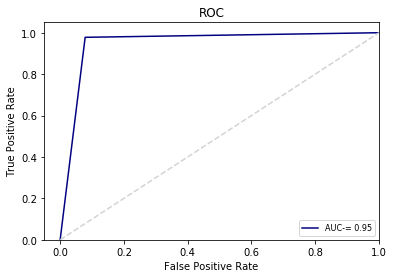

In [203]:
plotroc(naive_model)

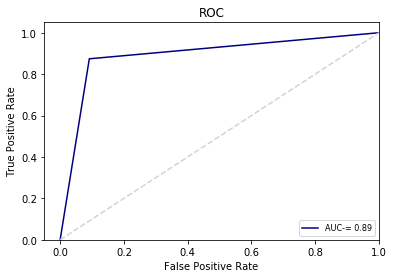

In [204]:
plotroc(treeclf)

/home/religofsil/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


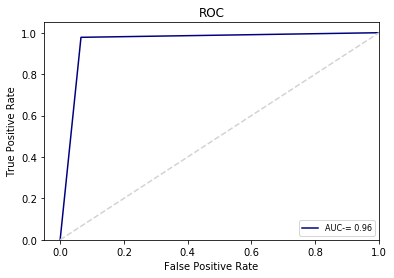

In [206]:
plotroc(forest)

Судя по roc-кривым, лучше всего лес, потом байес, потом дерево.

In [223]:
balanced_messages['length'] = balanced_messages['message'].map(lambda text: len(text))

In [255]:
balanced_messages.head()

,label,message,length,exclamation,caps,spamwords,spamrate
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,0,5,12,0.428571
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,2,2,3,0.093750
8,spam,WINNER!! As a valued network customer you have...,157,3,5,11,0.423077
9,spam,Had your mobile 11 months or more? U R entitle...,154,1,5,10,0.344828
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,1,9,8,0.307692


In [215]:
def excl(text):
    c = 0
    for i in text:
        if i=='!':
            c+=1
    return c

In [224]:
balanced_messages['exclamation'] = balanced_messages['message'].map(lambda text: excl(text))

In [226]:
def caps(text):
    c = 0
    for i in text.split():
        if i==i.upper():
            c+=1
    return c

In [227]:
balanced_messages['caps'] = balanced_messages['message'].map(lambda text: caps(text))

In [247]:
def makedict(label):
    spamdict = {}
    for i in balanced_messages['message'][balanced_messages['label'] == label]:
        for word in i.lower().split():
            if word not in spamdict:
                spamdict[word] = 1
            else:
                spamdict[word] += 1
    return spamdict
spamdict = makedict('spam')
hamdict = makedict('ham')
spam = set(sorted(spamdict, key=spamdict.get, reverse=True)[:1000])
ham = set(sorted(hamdict, key=hamdict.get, reverse=True)[:5000])

In [248]:
spam = spam-ham
len(spam)

653

In [251]:
def checkwords(text):
    c = 0
    text = text.lower()
    for i in text.split():
        if i in spam:
            c+=1
    return c

In [252]:
balanced_messages['spamwords'] = balanced_messages['message'].map(lambda text: checkwords(text))

In [254]:
balanced_messages['spamrate'] = balanced_messages['message'].map(lambda text: checkwords(text)/len(text.split()))

В качестве спецпризнаков я решила взять длину сообщения, кол-во восклицательных знаков и слов капсом, а также кол-во слов, характерных для спама, но не очень характерных для просто текстов (просто количество и с поправкой на длину сообщения).

In [258]:
X = balanced_messages[['length', 'exclamation', 'caps', 'spamwords', 'spamrate']]
y = balanced_messages['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [260]:
clf = RandomForestClassifier()

In [261]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [262]:
clf.feature_importances_

array([ 0.08103228,  0.00591622,  0.07905573,  0.38713628,  0.44685948])

Как видно, параметр spamrate (кол-во специфичных для спама слов с поправкой на длину сообщения) играет наибольшую роль, без поправки на длину тоже хорошо предсказывает. Количество восклицательных знаков меньше всего влияет на предсказание.

In [263]:
print(classification_report(clf.predict(X_test), y_test))

             precision    recall  f1-score   support

        ham       0.94      0.95      0.95       144
       spam       0.95      0.94      0.95       144

avg / total       0.95      0.95      0.95       288



In [264]:
cv_results = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.963806332556 0.00813526475189


Рандомный лес со сгенерированными признаками работает лучше, чем все предыдущие классификаторы.

/home/religofsil/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


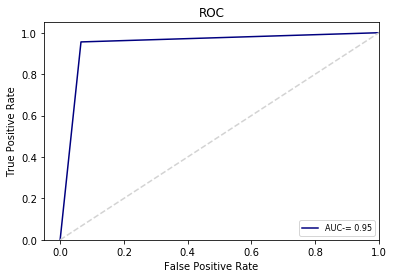

In [265]:
plotroc(clf)

<module 'matplotlib.pyplot' from '/home/religofsil/miniconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

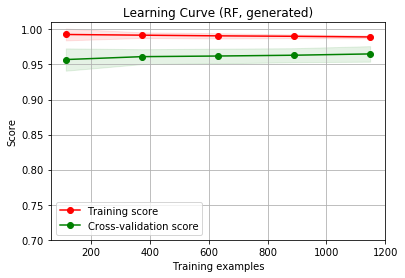

In [267]:
plot_learning_curve(clf, 'Learning Curve (RF, generated)', X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=6)

Ну, такое. Добавить ещё примеров, кажется, не сильно поможет. ROC-кривая симпатичная -- в смысле, площадь под кривой большая, это хорошо, это значит, что кол-во FP растёт медленнее кол-ва TP.